In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析器
from astropy.io import fits
from scipy import signal
from sklearn import preprocessing
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d # scipyのモジュールを使う
import seaborn as sns
import glob
import os
from pathlib import Path

In [152]:
data = fits.getdata("../output_preprocess/20051024/registration/cor2_st_2486640220_b_reg_.fits")
#data = fits.getdata("../output_preprocess/20051119/registration/cor1_st_2566178777_b_reg_.fits")
#data = fits.getdata("../output_preprocess/20051022/registration/cor2_st_2481909443_b_reg_.fits")
#data = fits.getdata("../output_preprocess/20051022/registration/cor2_st_2483136492_b_reg_.fits")
#data = fits.getdata("../output_preprocess/20051103/registration/cor1_st_2516090882_b_reg_.fits")
#data = fits.getdata("../output_preprocess/20050923/registration/cor2_st_2400976952_b_reg_.fits")
# data = fits.getdata("../output_preprocess/20051013/registration/cor1_st_2456105349_b_reg_.fits")
# data = fits.getdata("../output_preprocess/20050917/registration/cor2_st_2385559680_b_reg_.fits")
data = fits.getdata("../output_preprocess/20050925/registration/cor2_st_2406717897_b_reg_.fits")


In [5]:
def find_greater_than_100_and_smallest_difference(value, lst):
    # 各要素と指定された値との差を計算
    differences = [(element, abs(element - value)) for element in lst if element > value and (element - value) >= 100]

    if not differences:
        return None  # 条件を満たす要素がない場合はNoneを返すか、適切な処理を行う

    # 差が小さい順にソート
    sorted_differences = sorted(differences, key=lambda x: x[1])

    # 指定された値よりも100以上大きく、かつ一番小さい差を持つ要素を取得
    result_element = sorted_differences[0][0]

    return result_element

In [6]:
def find_greater_than_100_and_second_smallest_difference(value, lst):
    # 各要素と指定された値との差を計算
    differences = [(element, abs(element - value)) for element in lst if element > value and (element - value) >= 100]

    if len(differences) < 2:
        return None  # 要素が足りない場合はNoneを返すか、適切な処理を行う

    # 差が小さい順にソート
    sorted_differences = sorted(differences, key=lambda x: x[1])

    # 指定された値よりも100以上大きく、かつ2番目に小さい差を持つ要素を取得
    result_element = sorted_differences[1][0]

    return result_element


[38]


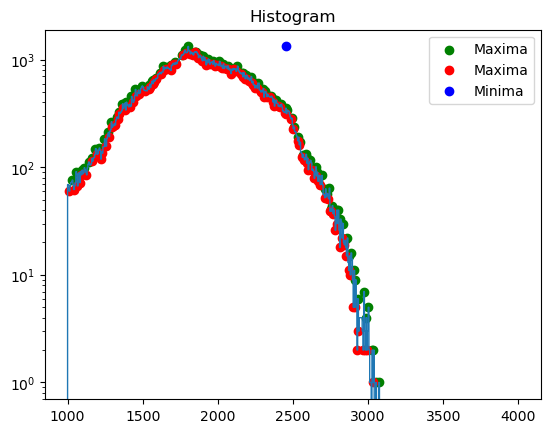

In [151]:

histogram, bin_edges = np.histogram(data.flatten(), bins = 600, range = (1000, 4000))
# ヒストグラムをプロットする
plt.hist(data.flatten(), bins = 600, range = (1000, 4000), log = True, histtype="step")
plt.title('Histogram')
# 極大値と極小値の位置を見つける
maxima_positions = signal.argrelmax(histogram.flatten(), order=1)[0]
minima_positions = signal.argrelmin(histogram.flatten(), order=1)[0]
#極大値から一番近い極小値の位置と値を求める
place = np.argmax(histogram[maxima_positions])
value = ((maxima_positions[place] * 5) + 1000) 
minima_val = (minima_positions * 5)+1000
maxima_val = (maxima_positions * 5)+1000
closest_value = min((x for x in maxima_val if value + 100 < x <= value + 400), key=lambda x: abs(x - value), default=value) * 1.05
filtered_values = [x for x in (maxima_positions * 5) + 1000 if x < value]
max_below_value = max(filtered_values, default=None)
#result = find_greater_than_100_and_second_smallest_difference(value, (minima_positions * 5) + 1000)
# result = find_greater_than_100_and_smallest_difference(value, (minima_positions * 5) + 1000)
result = closest_value
indices = np.where(maxima_val == max_below_value)[0]
print(indices)
plt.scatter((maxima_positions * 5) + 1000, histogram[maxima_positions], color='g', label='Maxima')
plt.scatter((minima_positions * 5) + 1000, histogram[minima_positions], color='r', label='Maxima')
plt.scatter(2451 , histogram[maxima_positions[place]], color='b', label='Minima')
plt.legend()
plt.yscale('log')
# sns.histplot(data.flatten(), kde = True, bins = 600)
# plt.xlim(2000, 3500)
# plt.savefig("order_16.pdf")
plt.show()

In [97]:
place = np.argmax(histogram[maxima_positions])
value = ((maxima_positions[place] * 5) + 1000)
print(value, value*1.2)
filtered_values = [x for x in (maxima_positions * 5) + 1000 if x < value]
max_below_value = max(filtered_values, default=None)
print(max_below_value, max_below_value * 1.2)

2120 2544.0
2095 2514.0


In [146]:
print(closest_value)

2005.5


In [147]:
np.mean(data)

1328.3218831294894

In [148]:
np.std(data)

902.8023560969509

In [150]:
print((np.mean(data)+np.std(data))*1.1)

2454.2366631490845


In [120]:
(maxima_positions * 5) + 1000

array([], dtype=int64)

In [65]:
print(histogram[maxima_positions])
print(np.sort(histogram[maxima_positions]))
print(np.sort(histogram[maxima_positions])[-2])
result = np.sort(histogram[maxima_positions])[-2]
indices = np.where(histogram[maxima_positions] == result)[0]
maxima_val = (maxima_positions[indices] * 5) + 1000
print(maxima_val)

[ 20  16  16   8  15  12  16  16   4  28  12  12  24   8  20  16  16  20
  16  20  16  12  20  16  12  24  16  12  16  16  24  24  24  28  31  20
  48  24  36  40  40  24  48  40  28  48  48  48  28  44  48  48  60  52
  71  76  88 110 139 180 180 247 252 360 388 475 388 395 355 371 340 331
 351 278 300 231 175 184 164 136 180 124 107  84  96  52  44  24  20  12
   8   4   4]
[  4   4   4   8   8   8  12  12  12  12  12  12  12  15  16  16  16  16
  16  16  16  16  16  16  16  16  20  20  20  20  20  20  20  24  24  24
  24  24  24  24  24  28  28  28  28  31  36  40  40  40  44  44  48  48
  48  48  48  48  48  52  52  60  71  76  84  88  96 107 110 124 136 139
 164 175 180 180 180 184 231 247 252 278 300 331 340 351 355 360 371 388
 388 395 475]
395
[2150]


In [64]:
arr = np.array([1, 2, 3, 2, 4, 2])

# 特定の値と等しい要素のインデックスを取得
indices = np.where(arr == 2)[0]

print(indices)

[1 3 5]


In [58]:
print(((maxima_positions * 5) + 1000) * 1.2)

[1206. 1230. 1254. 1272. 1302. 1314. 1326. 1374. 1392. 1410. 1452. 1512.
 1524. 1542. 1560. 1572. 1614. 1626. 1638. 1674. 1686. 1710. 1734. 1746.
 1758. 1800. 1812. 1830. 1854. 1866. 1878. 1890. 1908. 1944. 1962. 1986.
 2004. 2016. 2034. 2058. 2070. 2082. 2100. 2112. 2124. 2136. 2160. 2178.
 2208. 2226. 2238. 2250. 2268. 2286. 2298. 2310. 2340. 2358. 2370. 2394.
 2412. 2454. 2472. 2502. 2514. 2544. 2568. 2580. 2592. 2616. 2634. 2646.
 2658. 2670. 2682. 2700. 2748. 2772. 2790. 2802. 2820. 2844. 2874. 2892.
 2904. 2928. 2940. 2994. 3018. 3042. 3066. 3090. 3132.]


In [36]:
print((minima_positions * 5) + 1000)
place = np.argmax(histogram[maxima_positions])
value = (maxima_positions[place] * 5) + 1000
result1 = find_greater_than_100_and_second_smallest_difference(value, (minima_positions * 5) + 1000)
result2 = find_greater_than_100_and_smallest_difference(value, (minima_positions * 5) + 1000)
print(value,result1, result2, closest_value)

[1040 1055 1065 1090 1100 1125 1165 1185 1205 1215 1230 1265 1280 1290
 1305 1315 1335 1350 1360 1370 1385 1400 1435 1450 1460 1470 1490 1505
 1535 1550 1560 1570 1580 1600 1650 1660 1675 1685 1705 1720 1730 1740
 1755 1765 1775 1790 1830 1845 1860 1870 1885 1900 1910 1920 1930 1955
 1970 1985 2000 2020 2055 2065 2090 2105 2135 2145 2155 2165 2190 2200
 2210 2220 2230 2245 2260 2285 2300 2320 2330 2345 2360 2390 2405 2415
 2435 2445 2455 2490 2505 2530]
2120 2230 2220 2345


In [114]:
place = np.argmax(histogram[maxima_positions])
value = (maxima_positions[place] * 5) + 1000
minima_val = (minima_positions * 5)+1000
closest_value = min(filter(lambda x: x > value, (minima_positions * 5)+1000), key=lambda x: abs(value - x), default=None)
indices = np.where(minima_val == closest_value)[0]
print(closest_value * 1.05)
print(closest_value)

1968.75
1875


In [42]:
indices = np.where(minima_val == closest_value)[0]
print(indices)
print((minima_positions[indices] * 5)+1000)

[40]
[1875]


In [50]:
print(((maxima_positions * 5) + 1000)*1.05)
print(((minima_positions * 5) + 1000))


[1963.5]
[1025 1040 1060 1095 1105 1115 1135 1145 1155 1185 1195 1215 1225 1240
 1255 1265 1280 1295 1305 1325 1350 1360 1390 1405 1415 1425 1475 1515
 1535 1560 1580 1590 1605 1640 1660 1685 1695 1710 1735 1850 1875 1995
 2050 2060 2090 2110 2130 2140 2165 2180 2190 2215 2245 2255 2270 2285
 2310 2325 2335 2350 2360 2375 2400 2420 2435]


<ipython-input-48-b7f364a07368>:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1500)


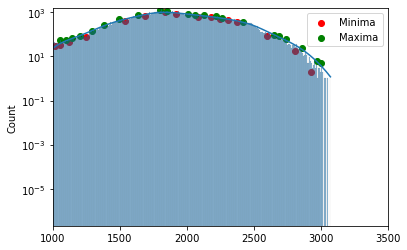

In [48]:
sns.histplot(data.flatten(), kde = True, bins = 600)
plt.scatter((minima_positions * 5)+1000, histogram[minima_positions], color='r', label='Minima', )
plt.scatter((maxima_positions * 5) + 1000, histogram[maxima_positions], color='g', label='Maxima')
plt.legend()
plt.yscale('log')
plt.xlim(1000, 3500)
plt.ylim(0, 1500)
plt.show()

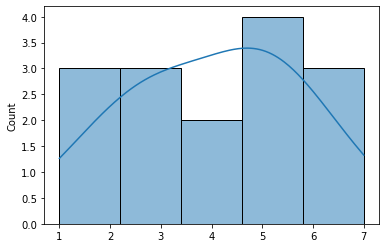

In [25]:
# サンプルデータの作成
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7]

# ヒストグラムとカーネル密度推定
sns.histplot(data, kde=True)

# グラフの表示
plt.show()

In [10]:
len(data.flatten())

260099

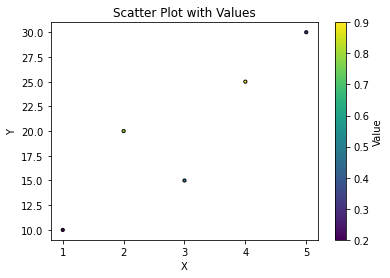

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# 仮想的なデータを作成
data = {'x': [1, 2, 3, 4, 5],
        'y': [10, 20, 15, 25, 30],
        'value': [0.2, 0.8, 0.5, 0.9, 0.3]}

df = pd.DataFrame(data)

# 画像上に点をプロット
plt.scatter(df['x'], df['y'], c=df['value'], cmap='viridis', s=10, edgecolors='black')

# カラーバーを表示
plt.colorbar(label='Value')

# ラベルやタイトルの設定
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Values')

# プロット表示
plt.show()

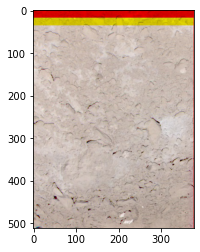

In [84]:
img = plt.imread("../output_preprocess/20051119/registration/0.jpg")
plt.imshow(img)
plt.show()

In [51]:
df = pd.DataFrame(columns=['座標_x', '座標_y'])
for i in range(1024):
    for j in range(1024):
        df.loc[len(df)+1] = [i,j]
df

KeyboardInterrupt: 

In [52]:
data = [(i, j) for i in range(1024) for j in range(1024)]

# データフレームを構築
df = pd.DataFrame(data, columns=['座標_x', '座標_y'])
df

,座標_x,座標_y
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1048571,1023,1019
1048572,1023,1020
1048573,1023,1021
1048574,1023,1022


In [71]:
i_data = fits.getdata("../output_preprocess/20051119/registration/cor1_st_2566178777_b_reg_.fits")

aa = pd.DataFrame(i_data.reshape(-1), columns=["b"])
data = [(i, j) for i in range(i_data.shape[1]) for j in range(i_data.shape[0])]

# データフレームを構築
df = pd.DataFrame(data, columns=['座標_x', '座標_y'])
f = pd.concat([df, aa, aa], axis = 1)
f

,座標_x,座標_y,b,b
0,0,0,0,0
1,0,1,0,0
2,0,2,0,0
3,0,3,0,0
4,0,4,0,0
...,...,...,...,...
192642,376,506,1666,1666
192643,376,507,1649,1649
192644,376,508,1609,1609
192645,376,509,1600,1600


In [70]:
print(i_data[170][203])

1887


In [59]:
two_dimensional_array = np.array([[1, 2, 3], [4, 5, 6]])

# 一列に変換してDataFrameに格納
flat_array = two_dimensional_array.reshape(-1)
df = pd.DataFrame({'Values': flat_array})
print(two_dimensional_array.shape)
print(df)

(2, 3)
   Values
0       1
1       2
2       3
3       4
4       5
5       6


In [72]:
# 仮想的なデータを作成
above_coordinates_list = [(0, 0), (0, 1), (1, 0), (1, 1)]
reflectances = {
    0: [[1, 2], [3, 4]],
    1: [[5, 6], [7, 8]],
    2: [[9, 10], [11, 12]],
    3: [[13, 14], [15, 16]]
}

# データを一度にまとめてDataFrameに変換
data = []
for coord in above_coordinates_list:
    values_at_coordinate = [reflectances[f][coord[0]][coord[1]] for f in range(4)]
    data.append([coord[1] + 1, coord[0] + 1] + values_at_coordinate)

# DataFrameを作成
columns = ['座標_x', '座標_y', '反射率_b', '反射率_v', '反射率_w', '反射率_p']
df = pd.DataFrame(data, columns=columns)

print(df)

   座標_x  座標_y  反射率_b  反射率_v  反射率_w  反射率_p
0     1     1      1      5      9     13
1     2     1      2      6     10     14
2     1     2      3      7     11     15
3     2     2      4      8     12     16


In [73]:
def split_images(image_files, batch_size):
    return [image_files[i:i + batch_size] for i in range(0, len(image_files), batch_size)]

In [81]:
def DN2reflectance(image_filelist):
    result = []
    data = []
    t = []
    scale_factor = [1.254, 1, 0.645, 1.514]
    rad = 3.42 * pow(10,-3)
    for i, image_file in enumerate(image_filelist):
        hdu = fits.open(image_file)[0]
        header = hdu.header
        data.append(hdu.data)
        t.append(header["EXP_0"])
    n = image_filelist[0].split("/registration")
    ff = image_filelist
    name = n[0]
    save_dir = f"{name}/reflectance"
    print(save_dir)
    path = Path(save_dir)
    path.mkdir(exist_ok=True)
    base = (data[1] / t[1]) * rad
    for i in range(4):
        result.append((((data[i] / t[i])) / base) * rad * scale_factor[i])
        ff = image_filelist[i].split("_reg_")
        f = ff[0].split("registration")
        # fits.writeto(f"{f[0]}reflectance{f[1]}.fits", result[i], overwrite=True)
    return result

In [219]:
target_dir = "20051103"
image_dir = f"../output_preprocess/{target_dir}/registration/"
image_files = sorted(glob.glob(os.path.join(image_dir, "*.fits")))

batch_size = 4

image_batches = split_images(image_files, batch_size)
print(image_batches[0])
images = []
for i in range(4):
    hdu = fits.open(image_batches[0][i])[0]
    header = hdu.header
    images.append(hdu.data)
datas = []
reflectances = DN2reflectance(image_batches[0])
data_coor = [(j+1, i+1) for i in range(images[0].shape[0]) for j in range(images[0].shape[1])]
datas = pd.DataFrame({
    '反射率_b': reflectances[0].reshape(-1),
    '反射率_v': reflectances[1].reshape(-1),
    '反射率_w': reflectances[2].reshape(-1),
    '反射率_p': reflectances[3].reshape(-1)
})
datas = pd.DataFrame({
    '反射率_b': images[0].reshape(-1),
    '反射率_v': images[1].reshape(-1),
    '反射率_w': images[2].reshape(-1),
    '反射率_p': images[3].reshape(-1)
})
# データフレームを構築
df = pd.DataFrame(data_coor, columns=['座標_x', '座標_y'])
df = pd.concat([df, datas], axis = 1)
df = df[df["反射率_b"] != 0]
df = df[df["反射率_w"] != 0]
df = df[df["反射率_p"] != 0]
df_r = df.replace([np.inf, -np.inf], np.nan).dropna()
df1 = df_r[df_r["反射率_b"]==1411]
df1
# df_r.to_csv('allcoord_test_.csv', index=False)



['../output_preprocess/20051103/registration/cor1_st_2516090882_b_reg_.fits', '../output_preprocess/20051103/registration/cor1_st_2516129281_v_reg_.fits', '../output_preprocess/20051103/registration/cor1_st_2516167681_w_reg_.fits', '../output_preprocess/20051103/registration/cor1_st_2516206081_p_reg_.fits']
../output_preprocess/20051103/reflectance


<ipython-input-81-7e793dce550b>:21: RuntimeWarning: divide by zero encountered in true_divide
  result.append((((data[i] / t[i])) / base) * rad * scale_factor[i])
<ipython-input-81-7e793dce550b>:21: RuntimeWarning: invalid value encountered in true_divide
  result.append((((data[i] / t[i])) / base) * rad * scale_factor[i])


,座標_x,座標_y,反射率_b,反射率_v,反射率_w,反射率_p
81680,241,161,1411,1479,1959,1352
84215,231,166,1411,1537,1890,1265
85287,285,168,1411,1579,2078,1443
86712,183,171,1411,1442,1822,1252
87230,192,172,1411,1513,1924,1333
...,...,...,...,...,...,...
502550,168,988,1411,1423,1868,1516
506024,79,995,1411,1530,2034,1714
507621,149,998,1411,1404,1785,1445
509105,106,1001,1411,1438,1863,1578


In [211]:
print(images[0].shape, images[1].shape, images[2].shape, images[3].shape)

(1023, 509) (1023, 509) (1023, 509) (1023, 509)


In [188]:
df_r

,座標_x,座標_y,反射率_b,反射率_v,反射率_w,反射率_p
79373,77,602,1469,1402,1876,1421
79374,77,603,1454,1409,1852,1453
79375,77,604,1445,1406,1870,1439
79376,77,605,1441,1425,1857,1445
79377,77,606,1447,1436,1863,1442
...,...,...,...,...,...,...
512085,500,585,1396,1543,2091,1789
512086,500,586,1486,1574,2091,1618
512087,500,587,1520,1593,2041,1133
512594,501,71,1100,1382,1903,1684


In [185]:
df

,座標_x,座標_y,反射率_b,反射率_v,反射率_w,反射率_p
0,0,0,0,0,2061,0
1,0,1,0,0,2028,0
2,0,2,0,0,1981,0
3,0,3,0,0,1896,0
4,0,4,0,0,1924,0
...,...,...,...,...,...,...
520702,508,1018,0,0,0,0
520703,508,1019,0,0,0,0
520704,508,1020,0,0,0,0
520705,508,1021,0,0,0,0


In [220]:
df2 = df1[df1["反射率_v"] == 1447]
df2

,座標_x,座標_y,反射率_b,反射率_v,反射率_w,反射率_p
93120,483,183,1411,1447,1883,1422


In [175]:
images[0]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [1406, 1544, 1609, ...,    0,    0,    0],
       [1312, 1531, 1604, ...,    0,    0,    0],
       [1268, 1477, 1588, ...,    0,    0,    0]], dtype=uint16)

In [191]:
data_coor = [(i, j) for i in range(5) for j in range(5)]
data_coor

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [206]:
data1 = np.array([i for i in range(25)])
data2 = np.array([i for i in range(25)])
data3 = np.array([i for i in range(25)])
data4 = np.array([i for i in range(25)])
datas = pd.DataFrame({
    '1': data1.reshape(-1),
    '2': data2.reshape(-1),
    '3': data3.reshape(-1),
    '4': data4.reshape(-1)
})

In [207]:
df = pd.DataFrame(data_coor, columns=['座標_x', '座標_y'])
df_f = pd.concat([df, datas], axis = 1)

In [208]:
df_f

,座標_x,座標_y,1,2,3,4
0,0,0,0,0,0,0
1,0,1,1,1,1,1
2,0,2,2,2,2,2
3,0,3,3,3,3,3
4,0,4,4,4,4,4
5,1,0,5,5,5,5
6,1,1,6,6,6,6
7,1,2,7,7,7,7
8,1,3,8,8,8,8
9,1,4,9,9,9,9


In [209]:
df_f = df_f[df_f["1"] != 5]

In [210]:
df_f

,座標_x,座標_y,1,2,3,4
0,0,0,0,0,0,0
1,0,1,1,1,1,1
2,0,2,2,2,2,2
3,0,3,3,3,3,3
4,0,4,4,4,4,4
6,1,1,6,6,6,6
7,1,2,7,7,7,7
8,1,3,8,8,8,8
9,1,4,9,9,9,9
10,2,0,10,10,10,10


In [221]:
df = pd.read_csv("../output_preprocess/20051103/reflectance/0_allcoord_.csv")
df

,座標_x,座標_y,反射率_b,反射率_v,反射率_w,反射率_p
0,479,156,0.872608,1.0,1.144616,0.767259
1,480,156,0.859407,1.0,1.124359,0.780639
2,481,156,0.855910,1.0,1.137710,0.774767
3,482,156,0.842160,1.0,1.114736,0.767625
4,483,156,0.839189,1.0,1.109771,0.760163
...,...,...,...,...,...,...
377163,32,1007,0.753468,1.0,1.159213,0.877688
377164,33,1007,0.786248,1.0,1.136382,0.778161
377165,34,1007,0.794645,1.0,1.095979,0.538406
377166,32,1008,0.662873,1.0,1.177893,0.922423
